In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


In [17]:
import plotly as pl
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [18]:
df = pd.read_csv('winequality.csv')
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


Creamos el dataset de tintos

In [ ]:
df_tinto = df[df['Tipo']==1]

Creamos el dataset de vinos blancos

In [ ]:
df_blanco = df[df['Tipo']==0]

In [19]:
df = df.drop(columns='Unnamed: 0')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Tipo                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [21]:
df['quality'] = df['quality'].astype(float)

In [22]:
corr = df.corr()

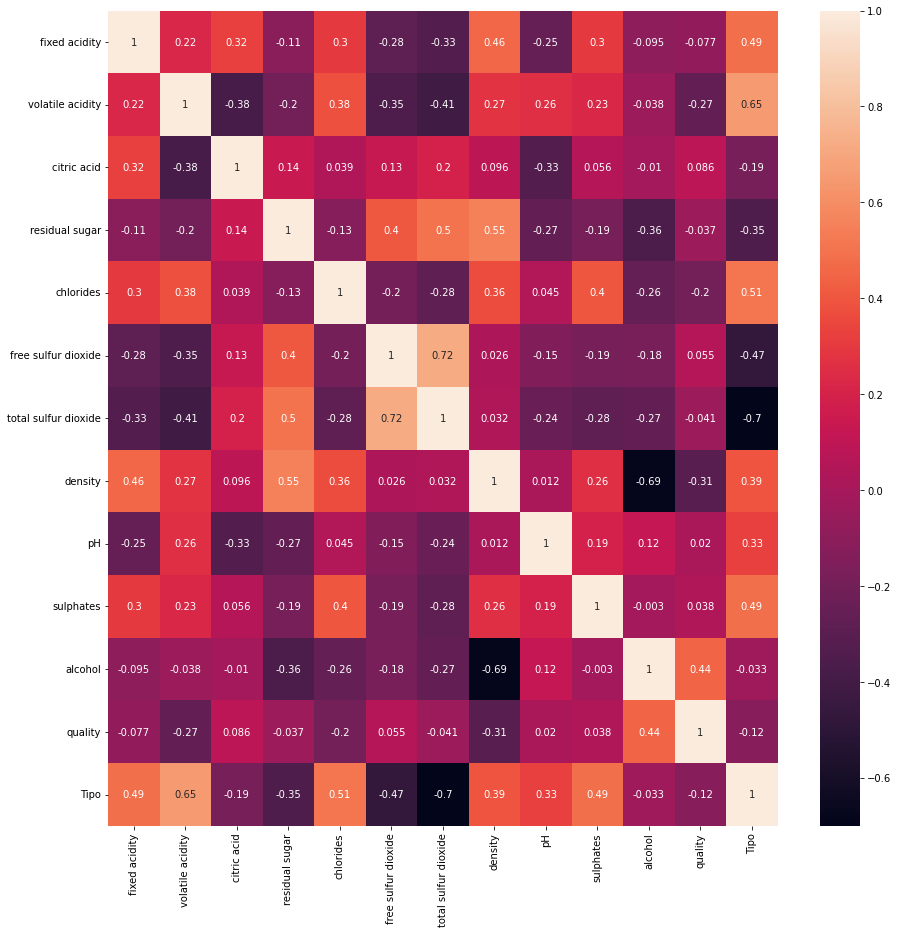

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True);

Las correlaciones más significativas son las de calidad con alcohol, densidad con azucar residual, azucar residual con total de sulfato de dioxido, alcohol y densidad, densidad y acidez fija.

## Alcohol y calidad

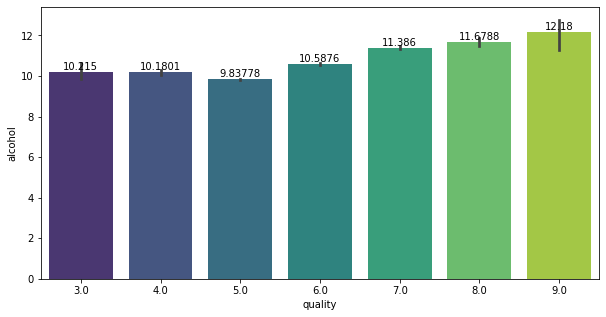

In [24]:
#Relación entre la cantidad de alcohol del vino y la calidad
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = 'quality', y = 'alcohol', data = df,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Observamos que las bebidas alcoholicas puntuan más en calidad.

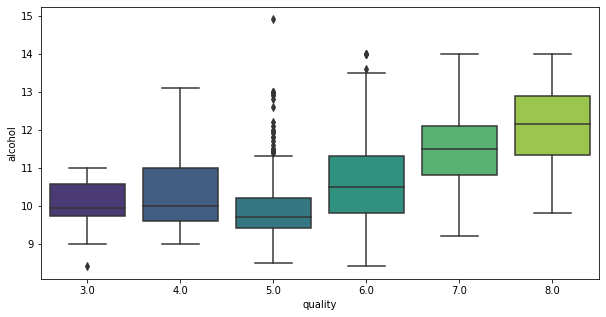

In [32]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['alcohol'], data = df,palette='viridis')
plt.title('')
plt.show()

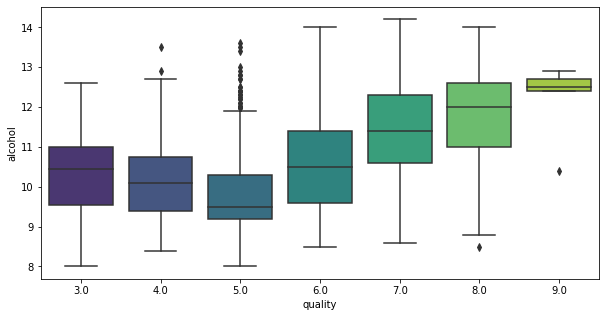

In [33]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['alcohol'], data = df,palette='viridis')
plt.title('')
plt.show()

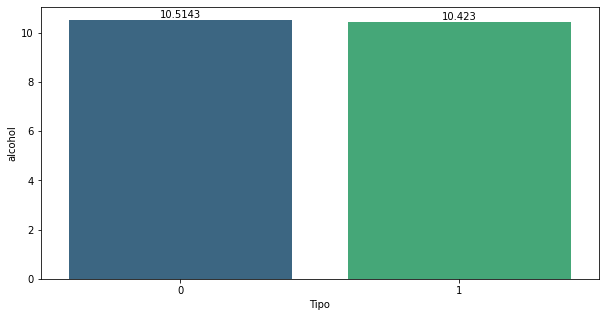

In [55]:
dfrd = df.groupby('Tipo')[['alcohol']].mean()
dfrd = dfrd.reset_index('Tipo')
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = dfrd['Tipo'], y = dfrd['alcohol'], data = dfrd,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### El vino blanco es ligeramente mas alcoholico de media que el tinto.

## Calidad y acidez volatil

#### A mayor acidez volatil más avinagrado esta el vino, exploraremos la relación entre la calidad de un vino y su grado de cuanto avinagrado esta.

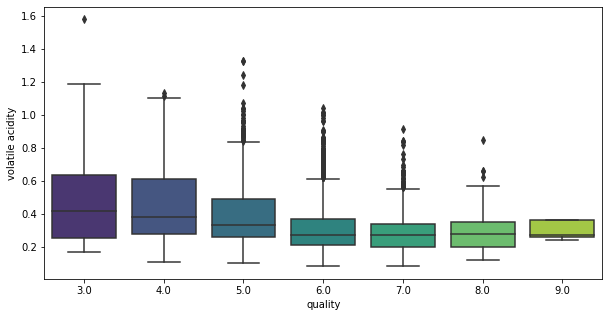

In [31]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'volatile acidity', data = df,palette='viridis')
plt.title('')
plt.show()

#### Cuanto mayor calidad tiene el vino, menos avinagrado esta.

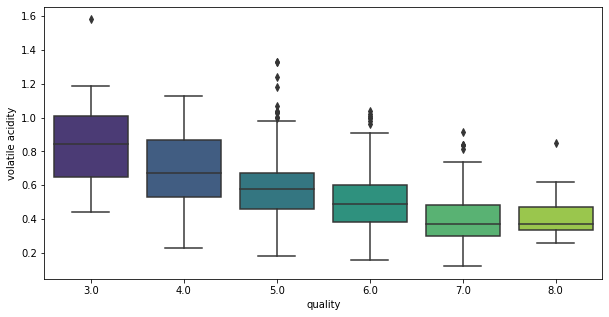

In [34]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['volatile acidity'], data = df,palette='viridis')
plt.title('')
plt.show()

#### Esta correlación es significativa con los vinos tintos, donde la acidez es un factor que penaliza de cara a su calidad.

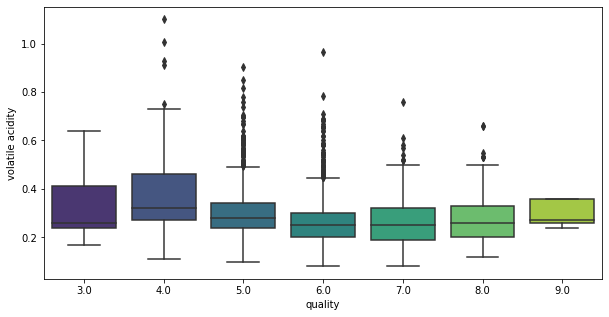

In [35]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['volatile acidity'], data = df,palette='viridis')
plt.title('')
plt.show()

#### Sin embargo con los vinos blancos esta correlación no es tan significativa, los vinos blancos tienden a tener una acidez bastante similar.

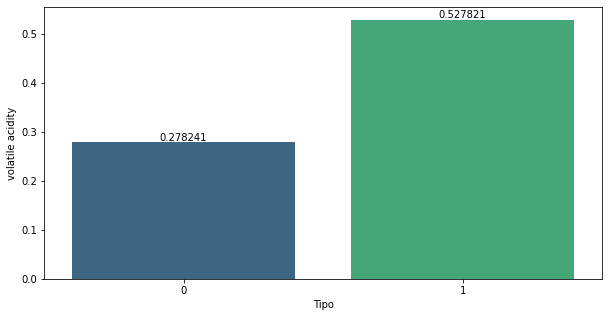

In [56]:
dfrd = df.groupby('Tipo')[['volatile acidity']].mean()
dfrd = dfrd.reset_index('Tipo')
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = dfrd['Tipo'], y = dfrd['volatile acidity'], data = dfrd,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### El vino tinto tiene mas acidez volatil que el blanco

## Calidad y densidad

#### Vamos a comprobar la relación entra la calidad y la densidad del vino

In [ ]:
#Comprobamos el valor minimo para establecer el minimo del eje Y, debido a que es una escala
#que comprende valores entre 0.98711 y 1.03898 y eso dificultaria la diferenciación de las barras.
print('El valor minimo de la densidad es',df['density'].min())
print('El valor maximo de la densidad es',df['density'].max())

El valor minimo de la densidad es 0.98711
El valor maximo de la densidad es 1.03898


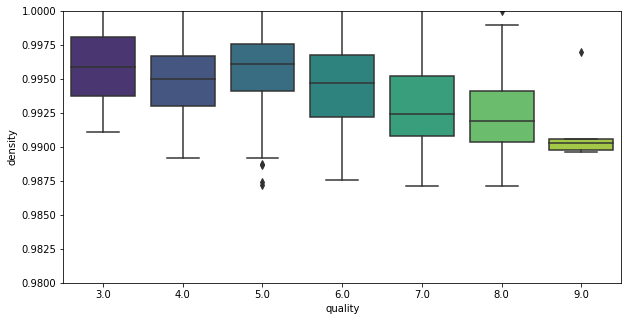

In [36]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'density', data = df,palette='viridis')
ax.set_ylim(0.98,1)
plt.title('')
plt.show()

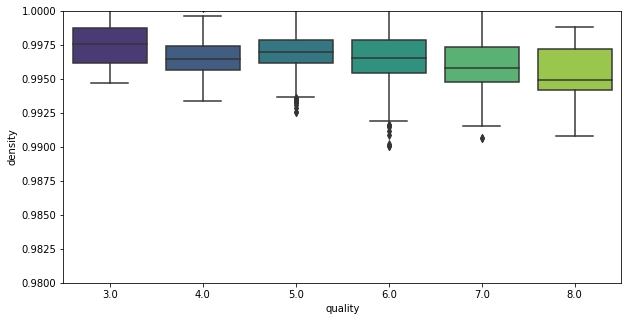

In [38]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['density'], data = df,palette='viridis')
ax.set_ylim(0.98,1)
plt.title('')
plt.show()

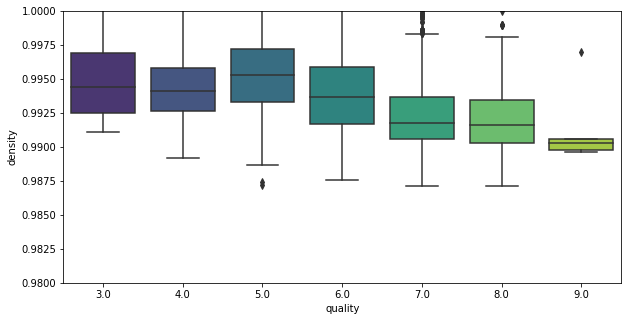

In [39]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['density'], data = df,palette='viridis')
ax.set_ylim(0.98,1)
plt.title('')
plt.show()

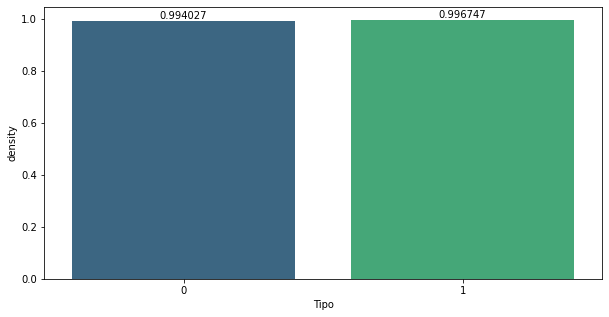

In [57]:
dfrd = df.groupby('Tipo')[['density']].mean()
dfrd = dfrd.reset_index('Tipo')
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = dfrd['Tipo'], y = dfrd['density'], data = dfrd,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Los vinos negros son más densos que los blancos todos siguen la correlación de que a menor densidad mayor calidad, en los blancos esta correlación se acentua.

## Calidad y acidez citrica

#### El ácido citrico en el vino surge de manera natural debido a su proceso de fermentación, el ácido citrico aporta sensación de frescura, vamos a comprobar si los vinos de mayor calidad contienen más ácido citrico.

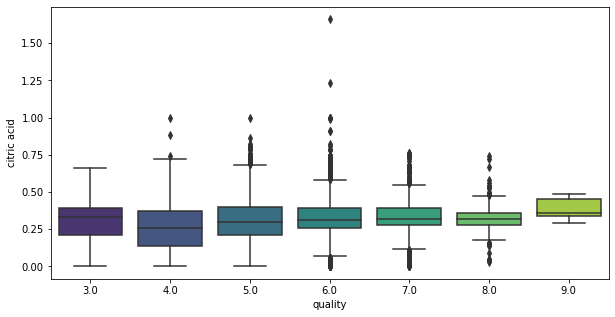

In [41]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'citric acid', data = df,palette='viridis')
plt.title('')
plt.show()

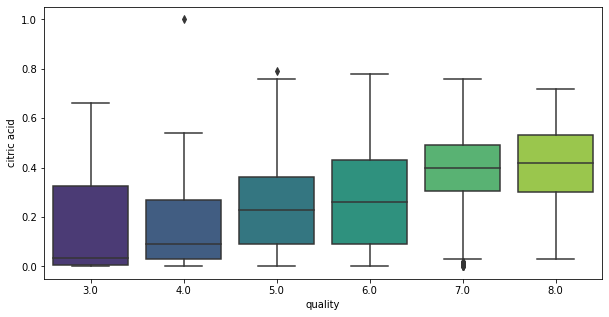

In [42]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['citric acid'], data = df,palette='viridis')
plt.title('')
plt.show()

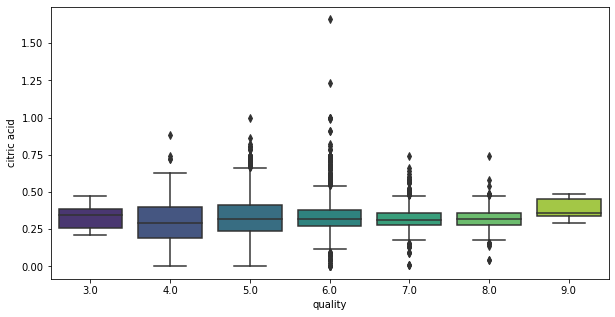

In [43]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['citric acid'], data = df_blanco,palette='viridis')
plt.title('')
plt.show()

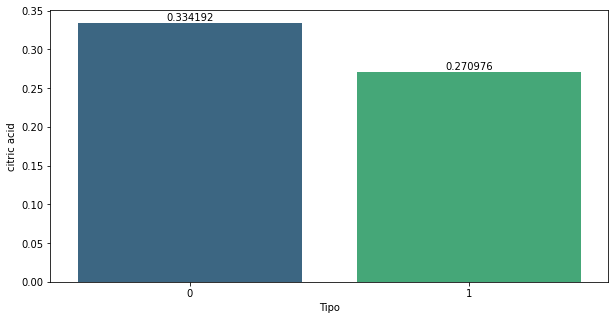

In [58]:
dfrd = df.groupby('Tipo')[['citric acid']].mean()
dfrd = dfrd.reset_index('Tipo')
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = dfrd['Tipo'], y = dfrd['citric acid'], data = dfrd,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Los vinos blancos tienden a ser mas frescos que los tintos y no hay una gran diferencia entre la frescura de los que menos puntuan y más puntuan, en los vinos tintos podemos observar que a medida que aumenta su frescura aumenta su calidad, habiendo si una gran diferencia entre la media de frescura de los que menos puntuan y más puntuan, como observación podemos apreciar que en los tintos que menos puntuan y más puntuan encontramos una gran concentración de outliers.



## Calidad y azucar residual

#### El azúcar residual es el cantidad de azúcar que queda en el vino despues del proceso de fermentación,vamos a comprobar si hay una relación con la calidad.

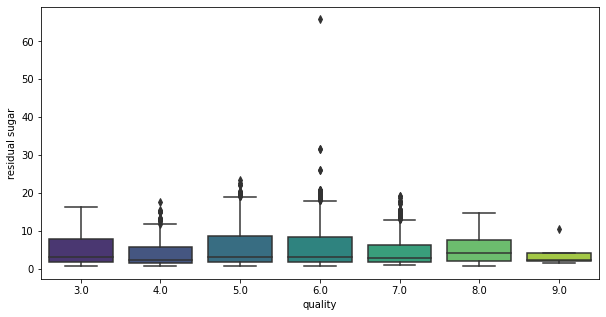

In [46]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'residual sugar', data = df,palette='viridis')
plt.title('')
plt.show()

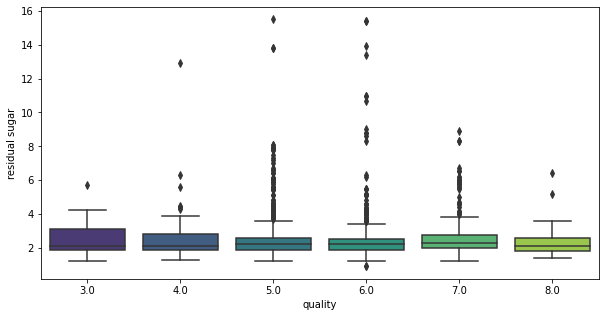

In [47]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['residual sugar'], data = df_tinto,palette='viridis')
plt.title('')
plt.show()

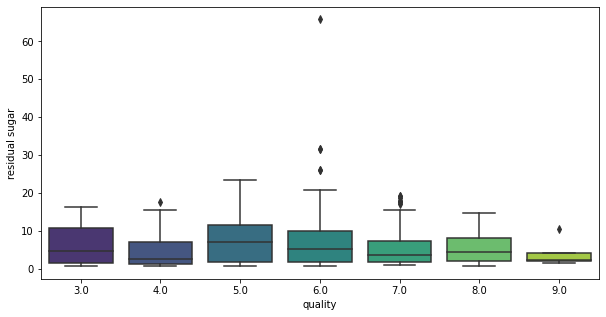

In [48]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['residual sugar'], data = df_blanco,palette='viridis')
plt.title('')
plt.show()

In [50]:
dfrd = df.groupby('Tipo')[['residual sugar']].mean()
dfrd = dfrd.reset_index('Tipo')

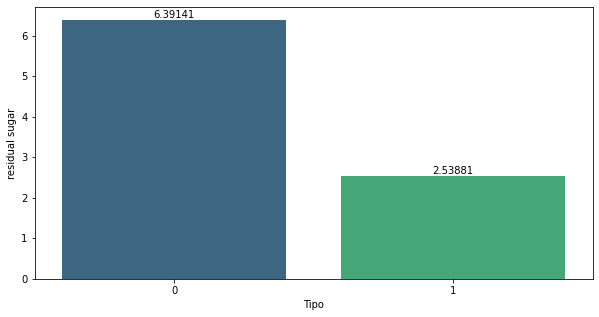

In [52]:
dfrd = df.groupby('Tipo')[['residual sugar']].mean()
dfrd = dfrd.reset_index('Tipo')
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x = dfrd['Tipo'], y = dfrd['residual sugar'], data = dfrd,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Podemos observar que no hay una relación con la calidad en los vinos tintos, todas las calidades presentan una azucar residual medio similar, sin embargo los vinos blancos presentan una ligera correlación negativa.

#### Tambien podemos observar que los vinos blancos son más dulces que los tintos.

## Calidad y sulfatos

#### Los sulfatos son sales derivadas del ácido sulfurico, las encontramos en el vino debido al uso de fertilizantes, pesticidades y productos que puede a llegar a contener el agua usada para el proceso de fermentación,los sulfitos tambien se pueden añadir a criterio ya que són utilizados para conservar aromas y antioxidantes del vino, unos niveles de sulfatos altos nos puede indicar mala calidad del agua, veamos si los vinos de más calidad, presentan niveles de sulfatos más bajos que los de menor calidad.

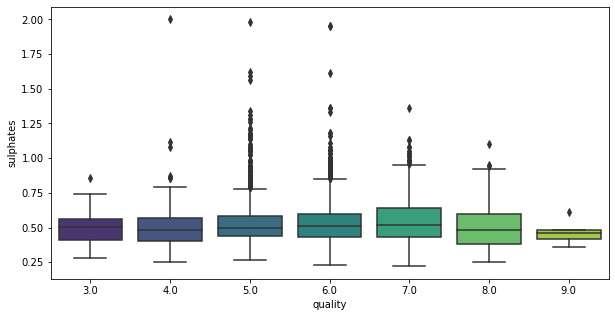

In [59]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'sulphates', data = df,palette='viridis')
plt.title('')
plt.show()

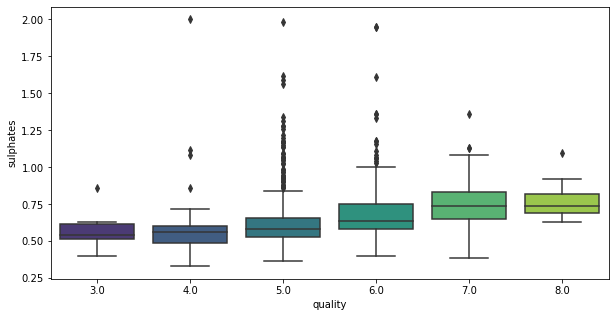

In [60]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['sulphates'], data = df,palette='viridis')
plt.title('')
plt.show()

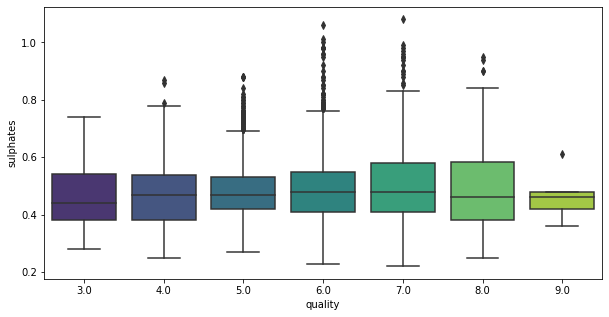

In [61]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['sulphates'], data = df,palette='viridis')
plt.title('')
plt.show()

#### A medida que aumenta la cantidad de sulfitos aumenta la calidad del vino tinto, sin embargo esta relación no existe con el vino blanco, que todas las calidades presentan niveles de sulfatos iguales en todas las calidades.

In [ ]:
sulfatos_tipo = df.groupby('Tipo')[['sulphates']].mean()
sulfatos_tipo = sulfatos_tipo.reset_index('Tipo')


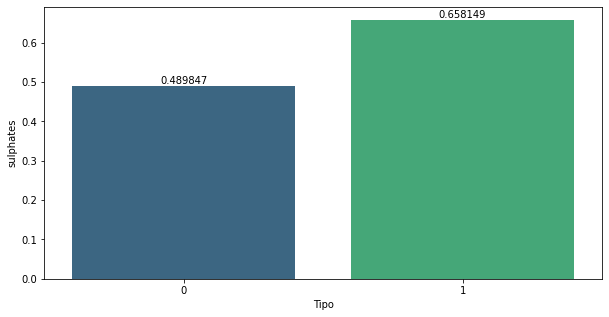

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x =sulfatos_tipo['Tipo'], y =sulfatos_tipo['sulphates'], data =sulfatos_tipo,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Los vinos tintos contienen más sulfatos de media que los vinos blancos, esto puede deberse a que el proceso de fermentación de los distintios tipos de vino es diferente, esto hace que se le añada mas sulfatos en el proceso de fermentación.

## Cloruros y calidad

#### El cloruro es la sal tal y como la conocemos, la sal no se le añade si no que proviene del suelo de donde es cultivada la uva, los cloruros en el vino pueden afectar su proceso de fermentación, dificultandola así,veamos si los vinos con mayor calidad presentan menos sal debido a que han tenido un proceso de fermentación más exitoso.

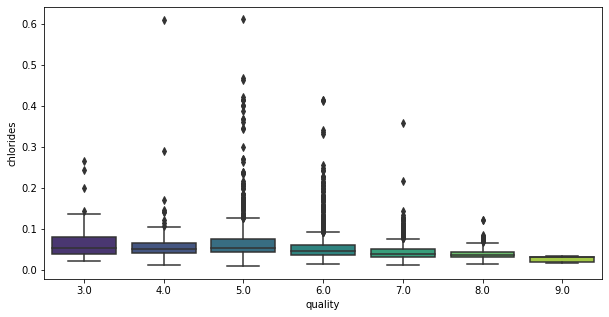

In [62]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'chlorides', data = df,palette='viridis')
plt.title('')
plt.show()

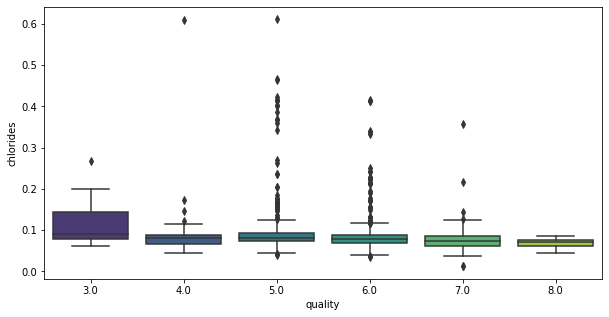

In [64]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['chlorides'], data = df,palette='viridis')
plt.title('')
plt.show()

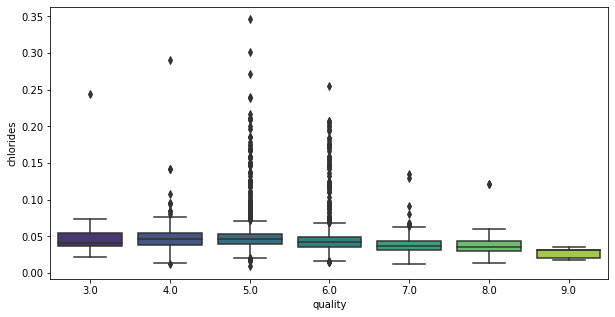

In [65]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['chlorides'], data = df,palette='viridis')
plt.title('')
plt.show()

#### Comprovamos que a menor cantidad de chloruros mayor calidad en ambos vinos.

In [ ]:
sulfatos_tipo = df.groupby('Tipo')[['chlorides']].mean()
sulfatos_tipo = sulfatos_tipo.reset_index('Tipo')


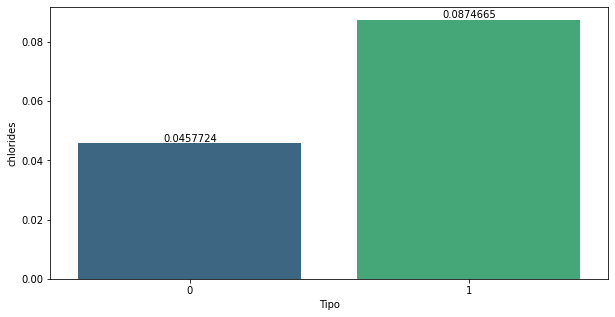

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x =sulfatos_tipo['Tipo'], y =sulfatos_tipo['chlorides'], data =sulfatos_tipo,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Los vinos tintos presentan casi el doble de cloruros de media que los vinos blancos, esto puede explicarse por que son un tipo de uva diferente, la uva utilizada en el vino blanco tiende a ser mucho más dulce, esta cultivada en una tierra con menos sal.

## Calidad y dioxido de azufre

#### El dioxido de azufre tiene como objetivo proteger al vino de microbios y evitar que se oxide, tambien evita que el vino cambie de color, veamos si esto afecta a la calidad.

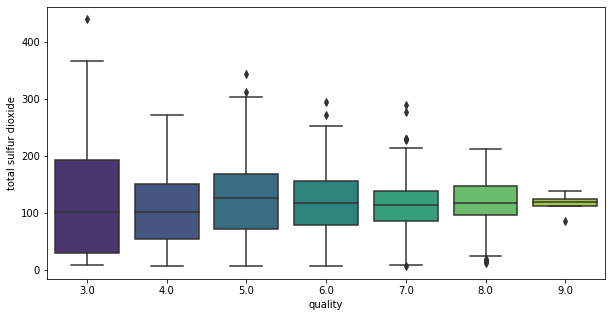

In [66]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df,palette='viridis')
plt.title('')
plt.show()

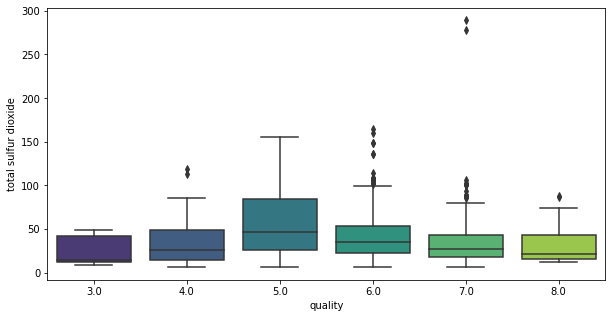

In [67]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['total sulfur dioxide'], data = df,palette='viridis')
plt.title('')
plt.show()

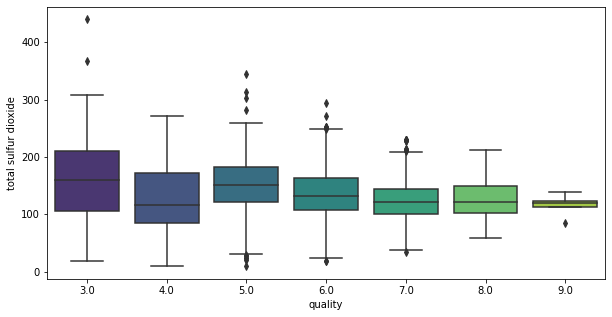

In [68]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['total sulfur dioxide'], data = df,palette='viridis')
plt.title('')
plt.show()

#### No apreciamos una relación significativa en el caso de los vinos tintos, sin embargo si apreciamos una relación negativa en el caso de los vinos blancos.

In [70]:
sulfatos_tipo = df.groupby('Tipo')[['total sulfur dioxide']].mean()
sulfatos_tipo = sulfatos_tipo.reset_index('Tipo')

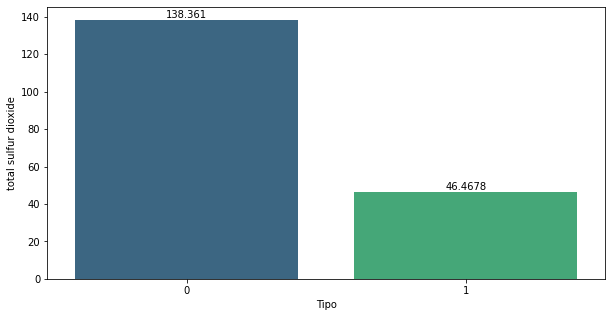

In [73]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x =sulfatos_tipo['Tipo'], y =sulfatos_tipo['total sulfur dioxide'], data =sulfatos_tipo,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Los vinos blancos presentan más dioxido de azufre, como ya hemos mencionado, uno de los usos es conservar el color del vino, este proceso es vital en los vinos blancos, debido a que la oxidación afecta mucho al color de los vinos blancos.

## Calidad y pH

#### El pH es otro indicador de la acidez del vino, en este caso nos indica en una escala del 0 al 14 cómo de acido es, siendo 0 muy acido y 14 muy basico, comprobemos si hay relación con la acidez del vino y su calidad.

In [ ]:
#Comprobamos el valor minimo para establecer el minimo del eje Y, debido a que es una escala
#que comprende valores entre 0.98711 y 1.03898 y eso dificultaria la diferenciación de las barras.
print('El valor de pH máximo es',df['pH'].max())
print('El valor de pH minimo es',df['pH'].min())

El valor de pH máximo es 4.01
El valor de pH minimo es 2.72


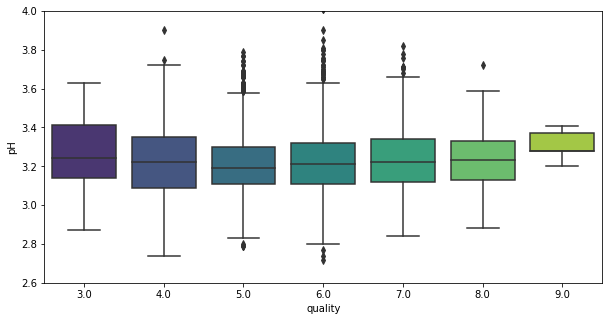

In [76]:

fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = 'quality', y = 'pH', data = df,palette='viridis')
ax.set_ylim(2.6,4)
plt.title('')
plt.show()

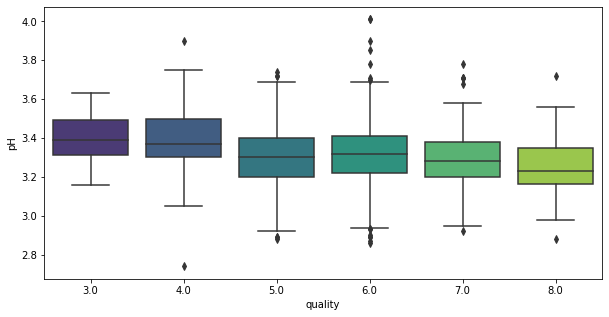

In [77]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_tinto['quality'], y = df_tinto['pH'], data = df,palette='viridis')
plt.title('')
plt.show()

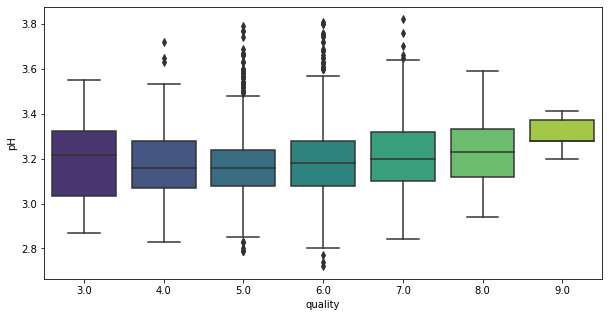

In [78]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x = df_blanco['quality'], y = df_blanco['pH'], data = df,palette='viridis')
plt.title('')
plt.show()

#### Apreciamos una ligera correlación, los vinos tintos tienden a ser menos acidos a medida que que aumenta su calidad, a diferencia de los blancos, tienden a ser algo más acidos a medida que aumenta su calidad.

In [ ]:
sulfatos_tipo = df.groupby('Tipo')[['pH']].mean()
sulfatos_tipo = sulfatos_tipo.reset_index('Tipo')

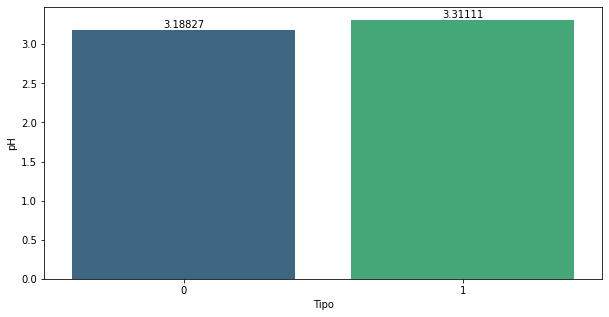

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.barplot(x =sulfatos_tipo['Tipo'], y =sulfatos_tipo['pH'], data =sulfatos_tipo,palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('')
plt.show()

#### Los vinos tintos tienden a ser más acidos de media que los blancos.

## Analisis de correlaciones

### Alcohol y densidad

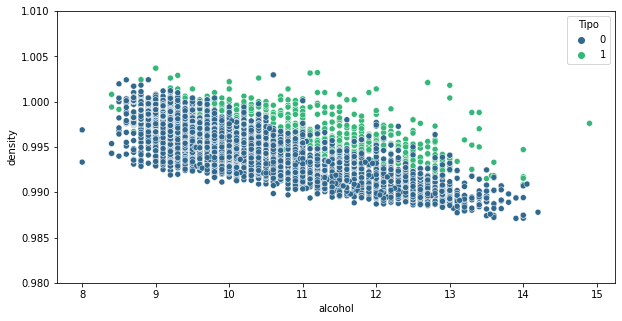

In [79]:

fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = 'alcohol', y = 'density', data = df,palette='viridis',hue='Tipo')
ax.set_ylim(0.98,1.01)
plt.title('')
plt.show()

#### Podemos apreciar mejor la correlación negativa, las bebidas más alcoholicas tienen a ser menos densas, esto sucede debido a que el alcohol es menos denso que el agua, y este al tener más peso en la botella, hace restar densidad al mosto.

#### Esta correlación la apreciamos en los tipos de vino.

## Densidad y azucar residual

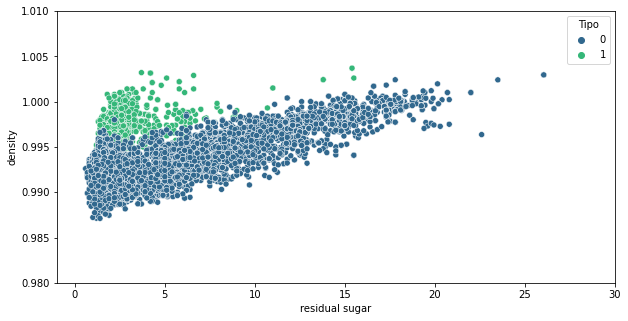

In [80]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = 'residual sugar', y = 'density', data = df,palette='viridis',hue='Tipo')
ax.set_ylim(0.98,1.01)
ax.set_xlim(-1,30)
plt.title('')
plt.show()

#### Observamos una tendencia positiva, cuanto más azucar residual tiene el mosto más denso es, lo podemos explicar con el ejemplo anterior, el azucar es más denso que el agua, por lo que a mayor cantidad de azucar más denso sera nuestro mosto.

#### Esta correlación es significativa con los vinos blancos, ya que son más dulces, en los vinos tintos es más irrelevante.

## Azucar residual y total de azufre 

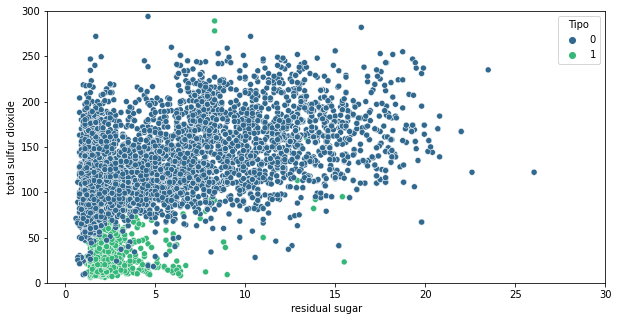

In [81]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = 'residual sugar', y = 'total sulfur dioxide', data = df,palette='viridis',hue='Tipo')
ax.set_ylim(0,300)
ax.set_xlim(-1,30)
plt.title('')
plt.show()

#### Observamos que hay una correlación en los vinos blancos, más que en los negros, como ya hemos mencionado anteriormente, el dioxido de azufre se utiliza como propiedades antioxidantes,conservantes y para conservar el color, y que este elemento era muy importante en los vinos blancos debido a que su color tendia a empeorar mucho peor que el tinto, y como los vinos blancos contienen más azucar, por eso apreciamos una relación entre el dioxido de azufre y el azucar residual.

## Densidad y acidez fija

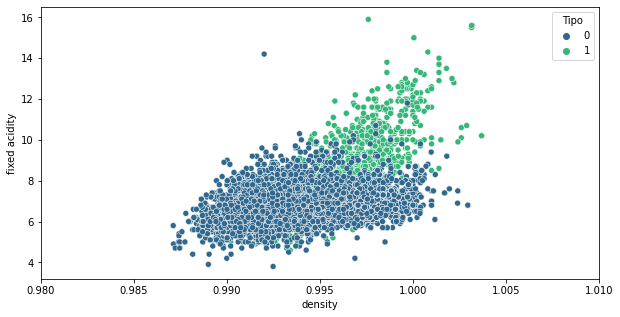

In [82]:
fig, ax  = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = 'density', y = 'fixed acidity', data = df,palette='viridis',hue='Tipo')
ax.set_xlim(0.98,1.01)
plt.title('')
plt.show()

#### Podemos apreciar que cuanto más acidez tiene un vino más denso es, mismo ejemplo que los anteriores, el elemento de la acidez es más denso que el agua.